In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from helpers.clear_data import clear_data
from helpers.enrich_data import enrich_data, enriched_column_names
from helpers.get_data import get_data
from helpers.mapper import mapper

data = get_data(r'C:\Users\rodri\OneDrive\Documentos\Repos\rBressanS\projeto-aplicado\data')
data['driver_a']['route_a']['trip_1'].head()


,time,Aceleração (m/s²),Altitude (GPS) (m),Distância percorrida (km),Distância percorrida (total) (km),Espaço livre no tanque de combustível (L),Nível de combustível (%) (%),Nível de combustível (V) (L),Posição do pedal do acelerador D (%),Posição do pedal do acelerador E (%),...,RPM do motor x1000 (rpm),Temperatura do líquido de \r\narrefecimento do motor (℃),Velocidade (GPS) (km/h),Velocidade do veículo (km/h),Velocidade média (km/h),Velocidade média (GPS) (km/h),Latitude,Longtitude,Unnamed: 19,file
time,,,,,,,,,,,,,,,,,,,,,
1900-01-01 19:32:20,19:32:24.282,NaN,799.126881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,0.000015,-23.556263,-46.896093,NaN,data_1.csv
1900-01-01 19:32:25,19:32:29.820,NaN,811.105744,0.00000,35.041601,38.5,23.0,11.5,20.0,9.0,...,1.0,88.0,3.678464,0.0,NaN,0.025677,-23.556227,-46.896099,NaN,data_1.csv
1900-01-01 19:32:30,19:32:34.930,0.000000,815.000000,0.00000,35.041601,38.5,23.0,11.5,20.0,9.0,...,0.8,87.0,0.000000,0.0,0.000000,0.460593,-23.556204,-46.896175,NaN,data_1.csv
1900-01-01 19:32:35,19:32:39.850,0.000000,808.822893,0.00000,35.041601,39.0,22.0,11.0,20.0,9.0,...,0.8,87.0,0.000000,0.0,0.000000,0.369647,-23.556274,-46.896117,NaN,data_1.csv
1900-01-01 19:32:40,19:32:44.970,0.127958,808.662864,0.00065,35.042250,39.0,22.0,11.0,20.0,9.0,...,0.8,87.0,0.000000,2.0,0.154407,0.283889,-23.556274,-46.896117,NaN,data_1.csv


In [3]:
clean_data = mapper(clear_data, data)
enriched_data = mapper(enrich_data, clean_data)
df: pd.DataFrame = None
for driver in enriched_data:
    for route in enriched_data[driver]:
        for trip_name in enriched_data[driver][route]:
            trip = enriched_data[driver][route][trip_name]
            trip["driver"] = driver
            trip["route"] = route
            trip["trip"] = trip_name
            if df is None:
                df = trip
            else:
                df = pd.concat([df, trip])

<Axes: title={'center': 'aceleracao_calculada_absoluta'}, xlabel='[driver]'>

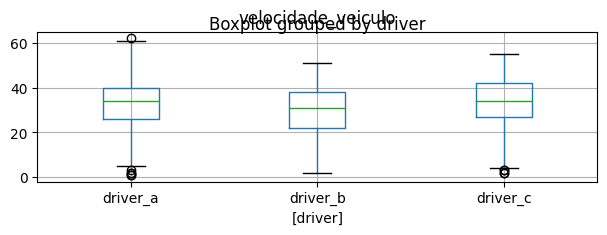

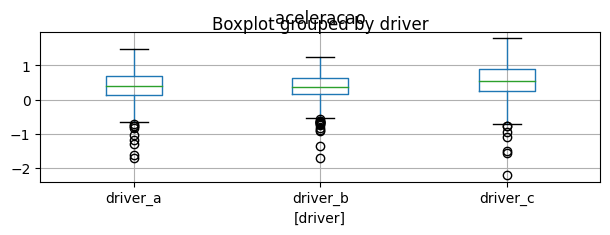

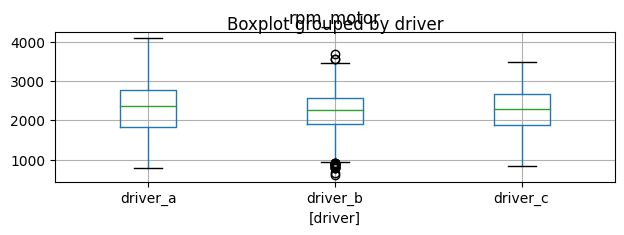

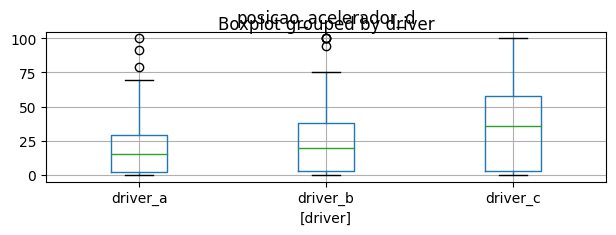

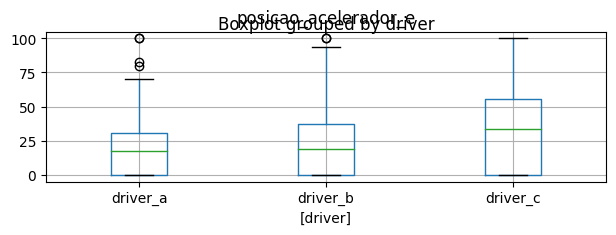

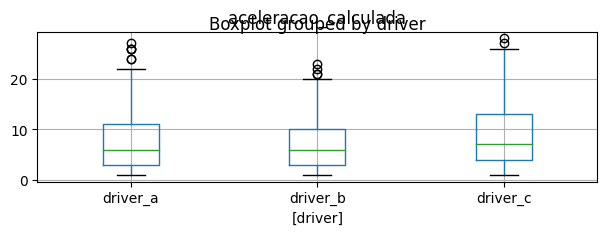

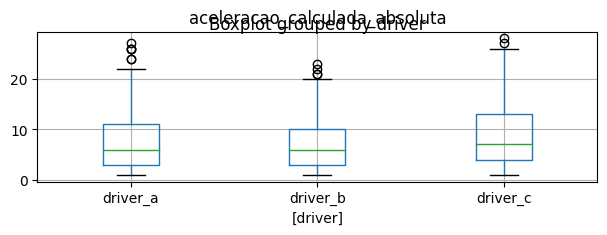

In [4]:
df.boxplot(column=[enriched_column_names.velocidade_veiculo], by=['driver'], figsize=(7,2),)
df.boxplot(column=[enriched_column_names.aceleracao], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.rpm_motor], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.posicao_acelerador_d], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.posicao_acelerador_e], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.aceleracao_calculada], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.aceleracao_calculada_absoluta], by=['driver'], figsize=(7,2))

In [5]:
from helpers.aggregate_data import agg_data

aggregated_data = mapper(agg_data, enriched_data)

In [6]:
df_agg: pd.DataFrame = None
for driver in aggregated_data:
    for route in aggregated_data[driver]:
        for trip_name in aggregated_data[driver][route]:
            trip = aggregated_data[driver][route][trip_name]
            trip["driver"] = driver
            # trip["route"] = route
            # trip["trip"] = trip_name
            if df_agg is None:
                df_agg = trip
            else:
                df_agg = pd.concat([df_agg, trip])

df_agg

statistic_variable,aceleracao_calculada_min,aceleracao_calculada_max,aceleracao_calculada_mean,aceleracao_calculada_std,aceleracao_calculada_q1,aceleracao_calculada_q2,aceleracao_calculada_q3,aceleracao_calculada_absoluta_min,aceleracao_calculada_absoluta_max,aceleracao_calculada_absoluta_mean,...,rpm_motor_q3,velocidade_veiculo_min,velocidade_veiculo_max,velocidade_veiculo_mean,velocidade_veiculo_std,velocidade_veiculo_q1,velocidade_veiculo_q2,velocidade_veiculo_q3,aceleracao_brusca_por_periodo,driver
value,1.0,24.0,7.542857,5.256916,3.00,6.0,11.0,1.0,24.0,7.542857,...,2643.00,2.0,54.0,31.638095,11.484206,26.00,33.0,40.00,0.114286,driver_a
value,1.0,27.0,7.990566,6.582076,3.00,6.0,11.0,1.0,27.0,7.990566,...,2858.50,1.0,62.0,32.433962,13.642384,26.00,34.5,40.00,0.141509,driver_a
value,1.0,22.0,7.044643,4.964992,3.00,6.0,11.0,1.0,22.0,7.044643,...,2593.50,2.0,45.0,29.441964,10.480945,22.00,31.5,38.00,0.035714,driver_b
value,1.0,19.0,6.517544,4.319604,3.00,6.0,9.0,1.0,19.0,6.517544,...,2588.25,3.0,51.0,30.228070,10.697808,22.25,32.0,39.00,0.035088,driver_b
value,1.0,23.0,6.754237,4.825035,3.00,6.0,9.0,1.0,23.0,6.754237,...,2481.00,2.0,48.0,28.025424,11.068135,22.25,29.0,36.75,0.059322,driver_b
value,1.0,28.0,8.688679,6.244789,3.25,7.0,13.0,1.0,28.0,8.688679,...,2692.50,2.0,53.0,32.707547,11.382499,27.00,34.5,41.75,0.141509,driver_c
value,1.0,20.0,8.266667,5.643694,4.00,7.0,12.0,1.0,20.0,8.266667,...,2571.00,3.0,51.0,32.371429,10.562322,27.00,34.0,40.00,0.142857,driver_c
value,1.0,27.0,9.979381,6.511175,5.00,8.0,15.0,1.0,27.0,9.979381,...,2692.00,2.0,55.0,33.783505,12.633641,26.00,35.0,43.00,0.237113,driver_c


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
scaler = StandardScaler()

# Define your target variable and features
y = le.fit_transform(df_agg['driver'])
X = df_agg.drop('driver', axis=1)
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Initialize the model
# model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
model = LogisticRegression(random_state=5)

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
# mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# print(f'Mean Squared Error: {mse}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [8]:
y_test, y_pred

(array([2, 1]), array([2, 1]))

In [9]:
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(df, title="Pandas Profiling Report")

# Display the report
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Python311\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# profile.to_file("report.html")